## Solving Newtons Heat Equation

Newtons law of cooling says that the rate of cooling or warming of body in a room is a function of the temperature of the body and it is proportionla to the difference between temperature of the body and the room temperature




we solve this by numerical method converting the above equation as iterative functions from forward euler scheme



In [2]:
%pylab inline
import plotly.offline as pyo
import plotly.express as px
from ipywidgets import widgets, interactive_output, interact
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

https://medium.com/modern-physics/simple-pendulum-odesolver-using-python-dcb30c267eee

In [56]:
class newton_cooling(object):
    
    """solver for newtons law of cooling and heating
    
    Parameters
    ------------
    alpha:             heat capacitance,
    T:                 temperature of body
    Tr:             temperature of the room
    T0:             initial temperature of the body
    n_itr:          total no of iterations
    
    Attributes
    ------------
    time: stores the values of time for all iterations
    T: stores the values of angular velocity for all iterations
    
    Methods
    ------------
    Forward Euler Method for solving PDE
    
    """
    
    def __init__(self,alpha=0.2,Tr=20.0,T0=5.0,delta_t=0.01,n_itr=100):
        
        self.alpha   = alpha
        self.Tr      = Tr
        self.T0      = T0
        self.delta_t = delta_t
        self.n_itr   = n_itr
        
    def euler(self):

        """
        Implements forward Euler method 
        """
        self.time  = np.zeros(self.n_itr)
        self.T = np.zeros(self.n_itr)

        #assign inital varaibles
        self.T[0] = self.T0
        
        # carry iterations
        for i in range(self.n_itr-1):

            self.time[i+1]   = self.time[i]  + self.delta_t
            self.T[i+1]  = self.T[i] + self.delta_t*(self.alpha*(self.Tr-self.T[i]))  ## MAin equation
        
        print("alpha: ", self.alpha)
        print("delta_t: ",self.delta_t)
        print("Room Temperature: ", self.Tr)
        print("Body Temperature: ",self.T0)

        return self

In [64]:
def plot_newton_cooling(alpha=0.2,Tr=20.0,T0=5.0,delta_t=0.01,n_itr=100):
    
    
    newt_cool= newton_cooling(alpha,Tr,T0,delta_t,n_itr).euler()
    
    
    fig = make_subplots(rows=1, cols=2,subplot_titles=["temp time series","T[1::2] vs T[0::2]"])


    fig.add_trace(go.Scattergl(
                                x = newt_cool.time,
                                y = newt_cool.T,
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,1)


    fig.add_trace(go.Scattergl(
                                x = newt_cool.T[0::2],
                                y = newt_cool.T[1::2],
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,2)




    fig.show()


In [65]:
def newton_heatflow():

    par = ["alpha","Tr","T0","delta_t","n_itr"]
    
    alpha       = widgets.FloatSlider(value= 56.42, min=0.0,max=58.0,step=0.001,orientation='vertical',description=par[0])
    Tr       = widgets.FloatSlider(value= 20.0, min=-100.0,max=1000.0,step=1.0,orientation='vertical',description="room temp")
    T0       = widgets.FloatSlider(value= 5.0, min=-100.0,max=1000.0,step=1.0,orientation='vertical',description="body temp")
    delta_t = widgets.FloatSlider(value= 0.035450001, min=0.001,max=0.1,step=0.00001,orientation='vertical',description=par[3])
    n_itr   = widgets.IntSlider(value= 500, min=50,max=10000,step=100,orientation='vertical',description=par[4])
    
    vec = widgets.HBox([alpha,Tr,T0,delta_t,n_itr])
    w = interactive_output(plot_newton_cooling,
                           { 
                            "alpha":alpha,
                            "Tr":Tr,
                            "T0":T0,
                            "delta_t":delta_t,
                            "n_itr":n_itr

                            })

    display(vec,w)

In [63]:
newton_heatflow()

Output()

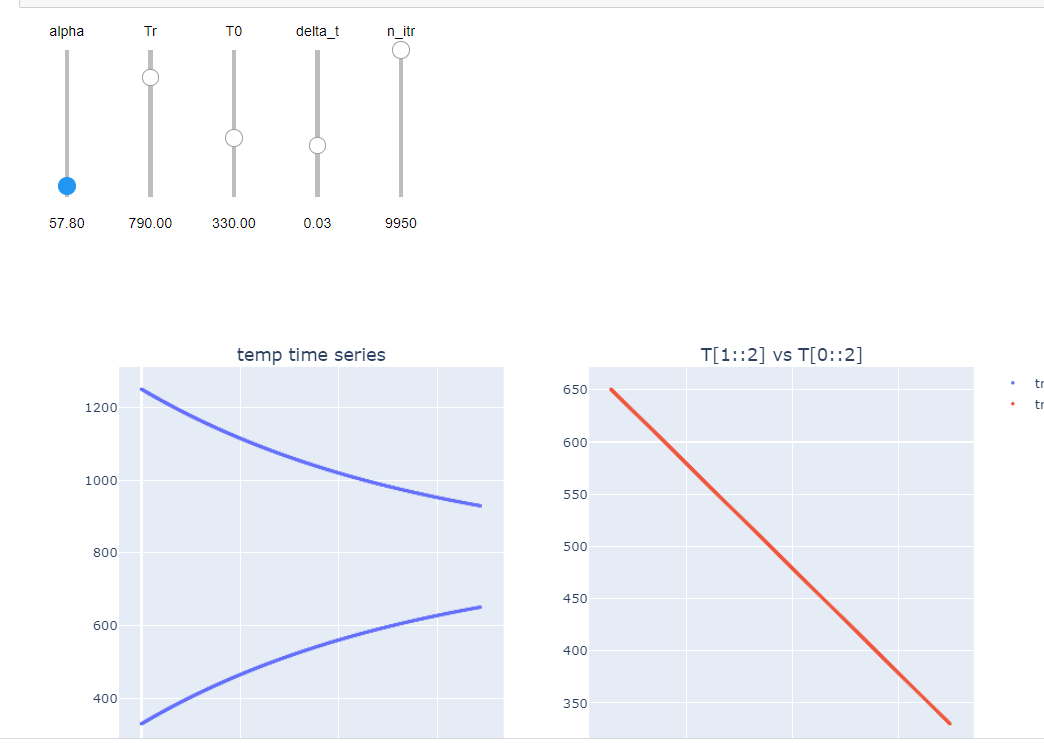

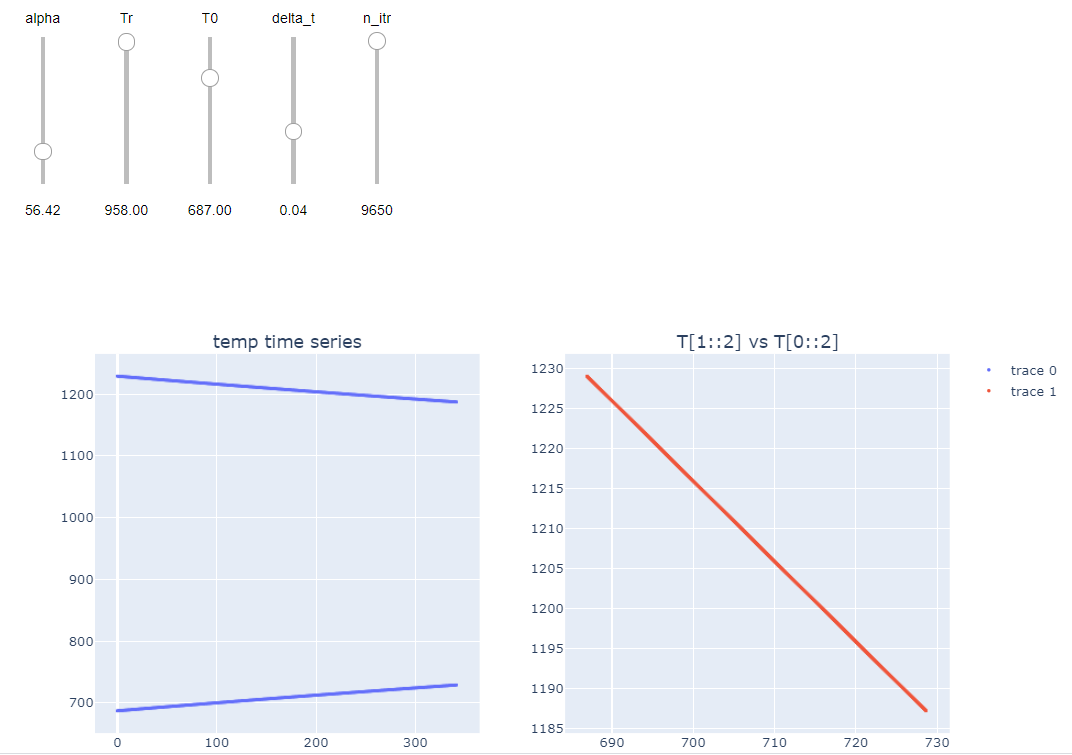

## Adding some nonlinearity

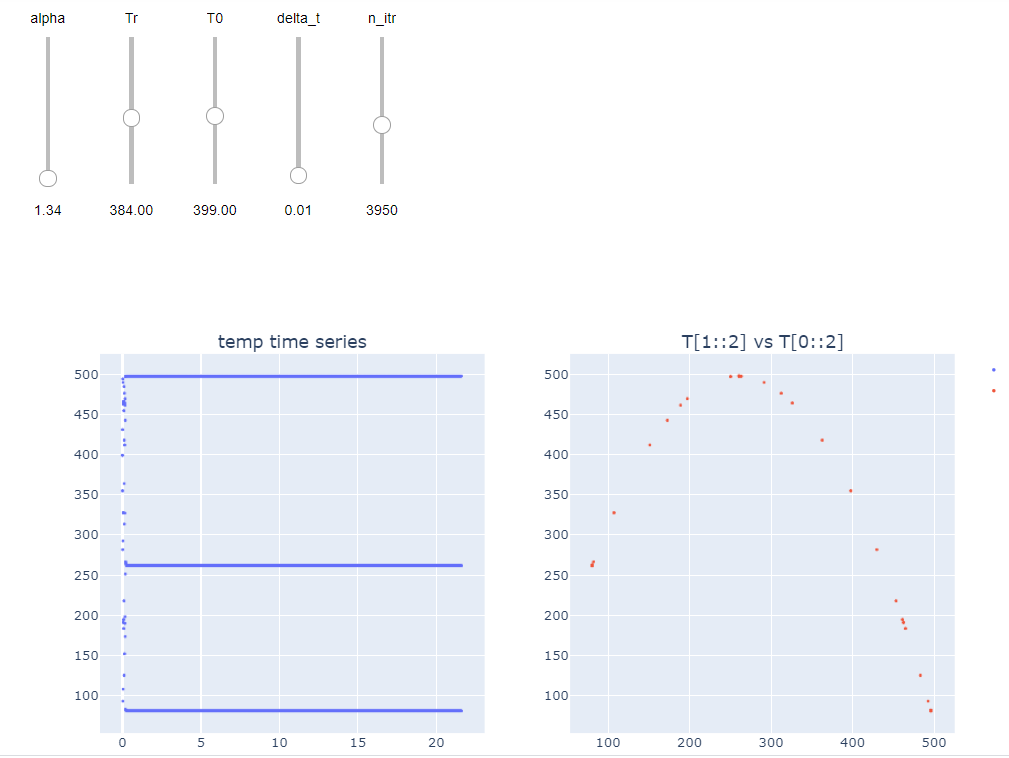

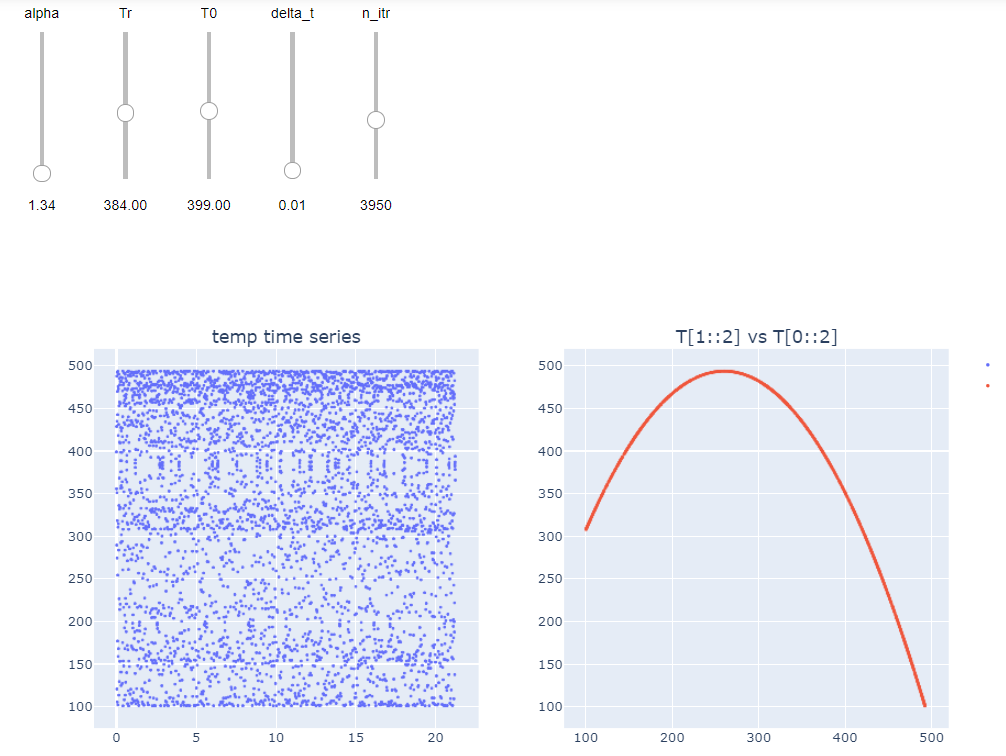

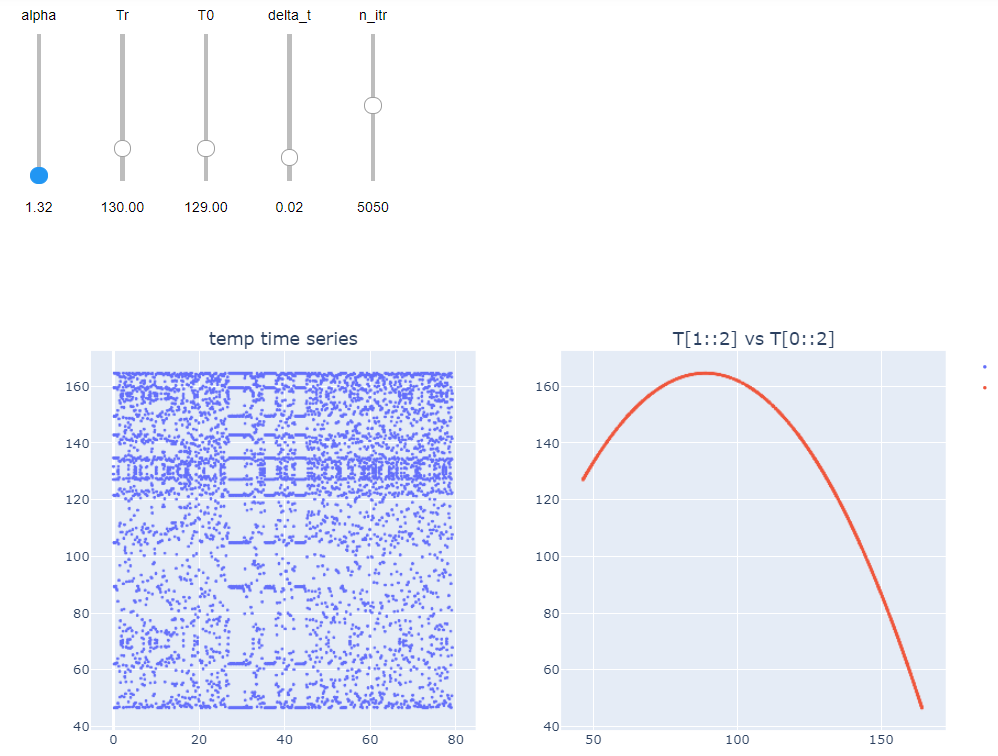